In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris


In [3]:
iris_data= load_iris()
X= iris_data.data
y=  iris_data.target

In [4]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance

In [6]:
X_imb, y_imb=make_imbalance(X,y,
                           sampling_strategy={
                               0:10,
                               1:20,
                               2:50
                           })

In [7]:
np.unique(y_imb,return_counts=True)

(array([0, 1, 2]), array([10, 20, 50], dtype=int64))

In [8]:
smote= SMOTE()

In [9]:
X_blc,y_blc= smote.fit_resample(X_imb,y_imb)

In [10]:
np.unique(y_blc,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

# classsifiacation

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
data= pd.read_csv('../dataset/Social_Network_Ads.csv')

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
data.drop(['User ID'], axis=1, inplace=True)

In [15]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [16]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
data['EstimatedSalary']= data['EstimatedSalary']/1000

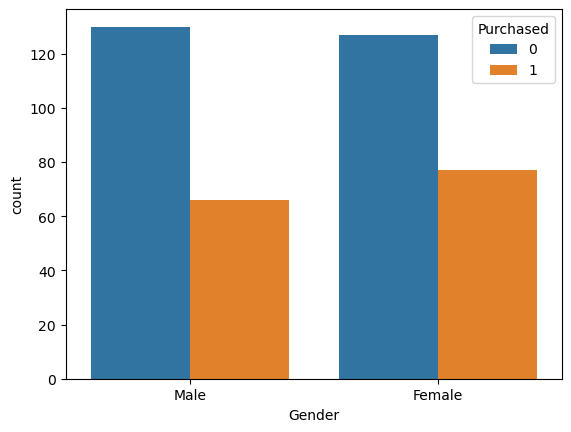

In [18]:
sns.countplot(x='Gender',data=data, hue= 'Purchased')
plt.show()

In [19]:
data.drop(['Gender'], axis=1 , inplace= True)

In [20]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19.0,0
1,35,20.0,0
2,26,43.0,0
3,27,57.0,0
4,19,76.0,0


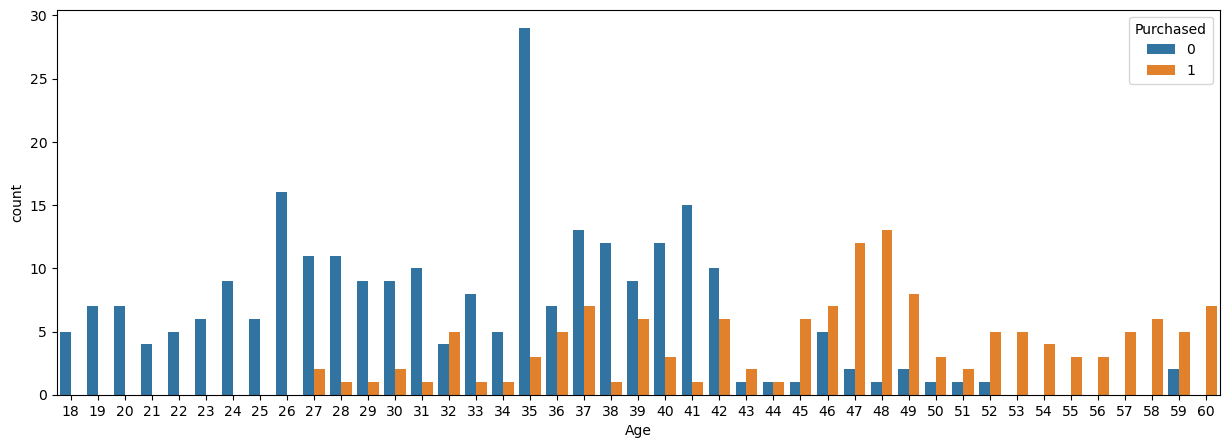

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=data, hue= 'Purchased')
plt.show()

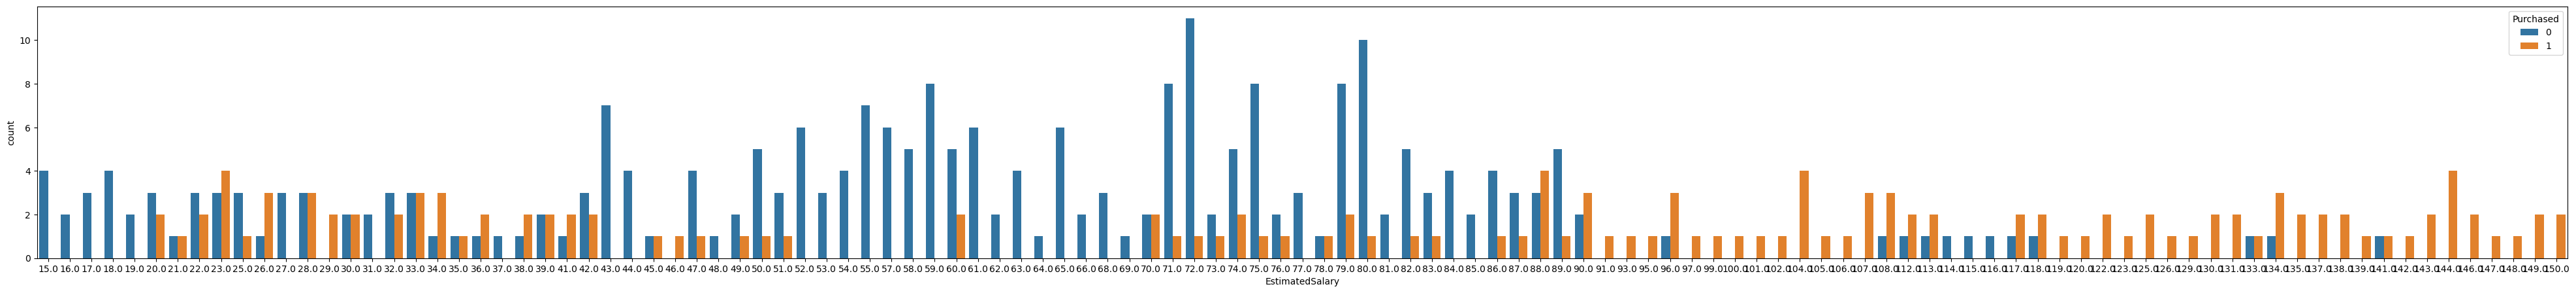

In [22]:
plt.figure(figsize=(50,5))
sns.countplot(x='EstimatedSalary',data=data, hue= 'Purchased')
plt.show()

In [23]:
data.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
y= data['Purchased']
X= data.drop(['Purchased'], axis=1)

In [25]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([257, 143], dtype=int64))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

In [27]:
smote = SMOTE()
#X_train,y_train = smote.fit_resample(X_train,y_train)

In [28]:
rand_forest= RandomForestClassifier()

In [29]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=rand_forest.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.78      0.86      0.82        21

    accuracy                           0.87        60
   macro avg       0.85      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [34]:
from sklearn.svm import SVC
#svm support vector machine
#sve support vector regressor
#svc support vector classifier

In [35]:
sup_vector= SVC()

In [36]:
sup_vector.fit(X_train,y_train)

SVC()

In [37]:
y_pred= sup_vector.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.80      0.76      0.78        21

    accuracy                           0.85        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60

